In [79]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
(X_train,y_train),(X_test,y_test)=keras.datasets.cifar10.load_data()

In [54]:
X_train.shape

(50000, 32, 32, 3)

In [55]:
y_train.shape

(50000, 1)

In [56]:
classes_string="airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, trucks".replace(",","").split(" ")

In [57]:
classes_string

['airplanes',
 'cars',
 'birds',
 'cats',
 'deer',
 'dogs',
 'frogs',
 'horses',
 'ships',
 'trucks']

[9]


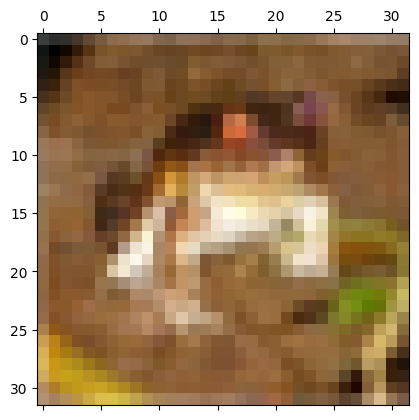

In [58]:
plt.matshow(X_train[0])
print(y_train[1])

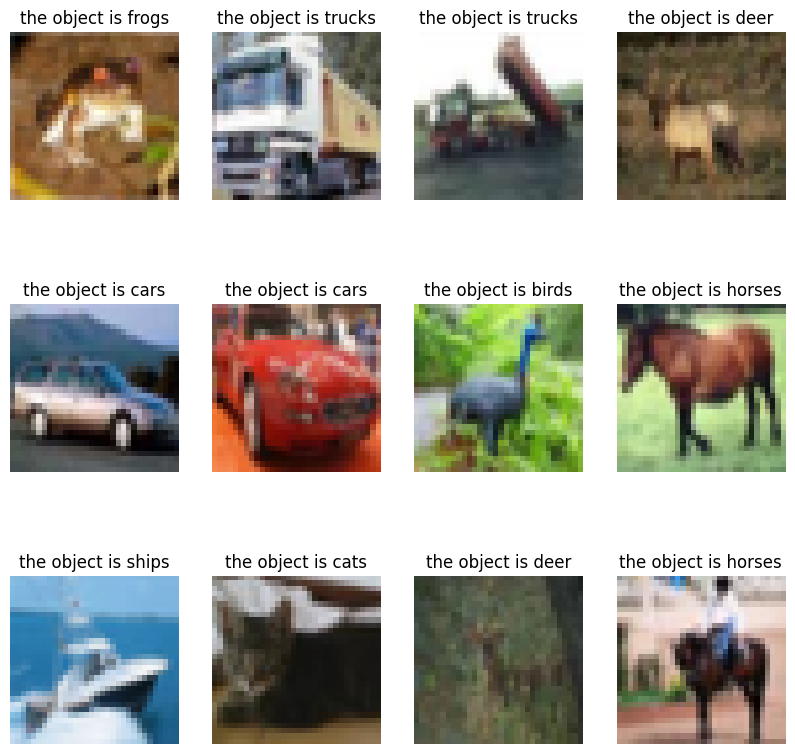

In [59]:
plt.figure(figsize=(10, 10))
for i in range(12):
  ax=plt.subplot(3, 4, i+1)
  plt.imshow(X_train[i])
  plt.title(f"the object is {classes_string[y_train.reshape(-1,)[i]]}")
  plt.axis("off")

In [60]:
max(y_train.reshape(-1,))

9

In [61]:
X_train.shape

(50000, 32, 32, 3)

In [73]:
model=keras.models.Sequential([
    keras.layers.experimental.preprocessing.Rescaling(1.0/255.0),
    keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu"),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=48,kernel_size=(3,3),activation="relu"),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(50,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
    ])
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [75]:
model.fit(X_train,y_train,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8041 - accuracy: 0.7161
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7858 - accuracy: 0.7240
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7557 - accuracy: 0.7366
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7413 - accuracy: 0.7414
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7234 - accuracy: 0.7452
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7070 - accuracy: 0.7525
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6948 - accuracy: 0.7569
Epoch 8/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6791 - accuracy: 0.7621
Epoch 9/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6650 - accuracy: 0.7659
Epoch 10/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.652

In [77]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.0207 - accuracy: 0.6845


[1.0206574201583862, 0.684499979019165]

In [84]:
y_pred=[np.argmax(i) for i in model.predict(X_test)]

313/313 [==============================] - 1s 3ms/step


In [87]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.75      0.71      1000
           1       0.83      0.79      0.81      1000
           2       0.65      0.51      0.57      1000
           3       0.51      0.50      0.51      1000
           4       0.62      0.67      0.64      1000
           5       0.57      0.62      0.59      1000
           6       0.80      0.69      0.74      1000
           7       0.69      0.74      0.72      1000
           8       0.78      0.80      0.79      1000
           9       0.75      0.78      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



<Axes: >

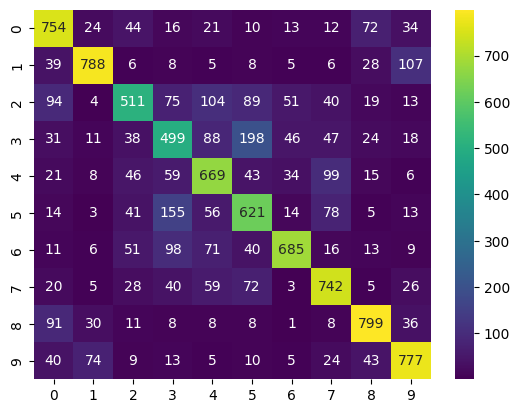

In [88]:
sns.heatmap(confusion_matrix(y_test,y_pred),fmt="d",annot=True,cmap="viridis")

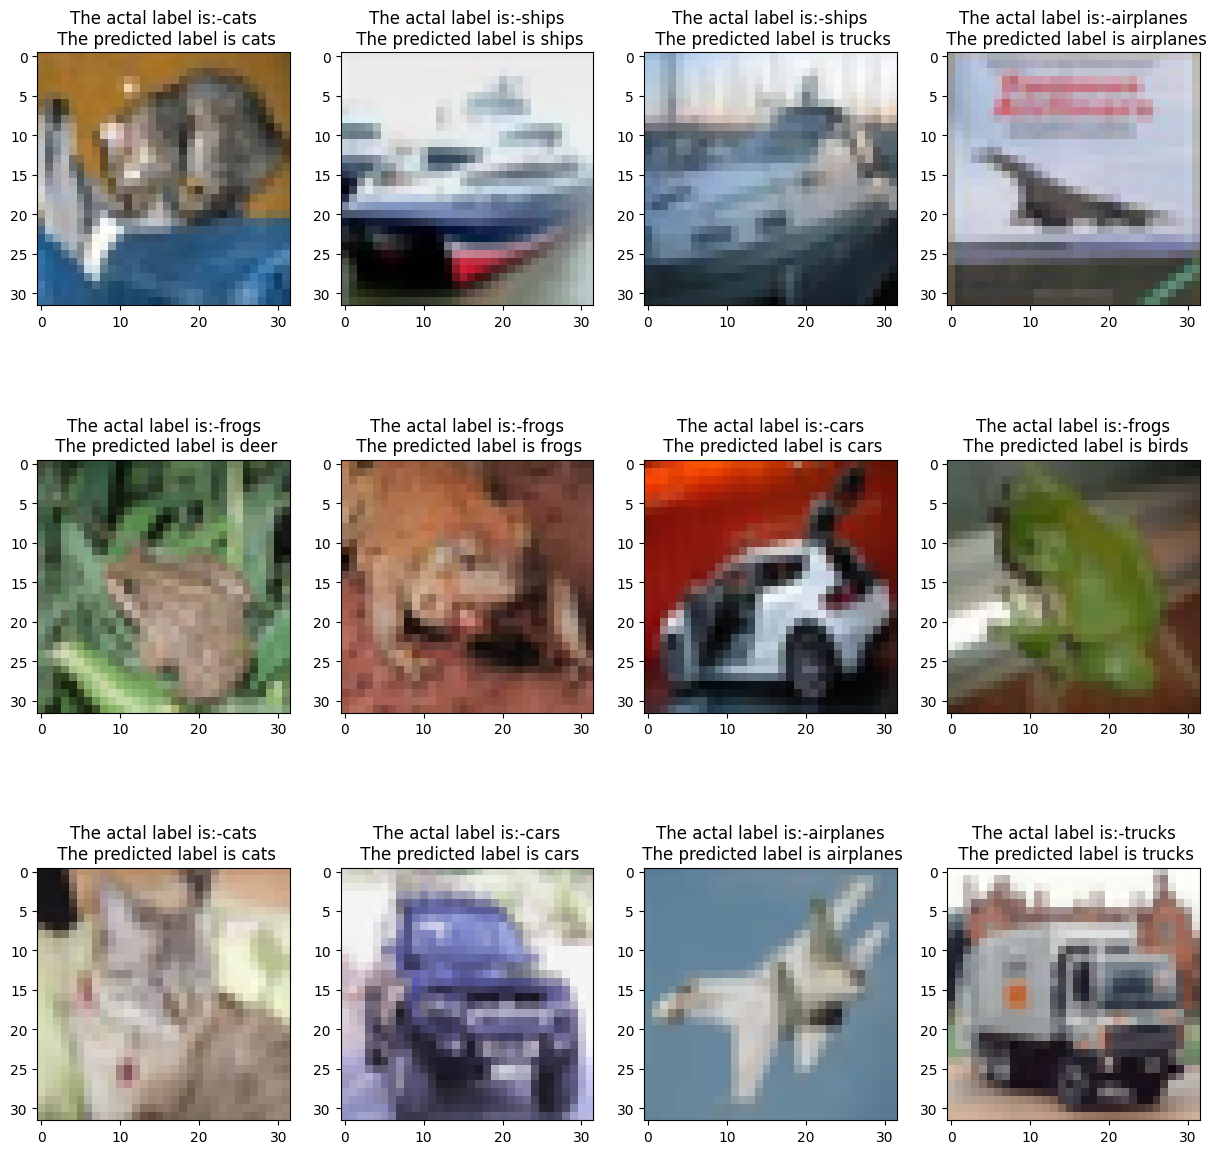

In [106]:
plt.figure(figsize=(15,15))
for i in range(12):
  ax=plt.subplot(3,4,i+1)
  plt.title(f"The actal label is:-{classes_string[y_test.reshape(-1,)[i]]}\n The predicted label is {classes_string[y_pred[i]]}")
  plt.imshow(X_test[i])